## Imports

In [392]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import RobustScaler
from scipy.spatial import distance
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import warnings


In [393]:
warnings.filterwarnings("ignore")


## 1. Load and explore the dataset

### Reading the dataset

In [394]:
df_raw = pd.read_csv('Volley_Ball_Score.csv')
df_raw


,Unnamed: 0,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Performance,Country,Players_Injured
0,0,-0.2924,-0.3871,0.8317,0.2060,NaN,0.2060,-0.2424,82.9055,below_average,France,1
1,1,0.1389,0.3659,0.5547,NaN,0.6240,NaN,1.1762,27.3858,below_average,Finland,2
2,2,0.9248,-2.3541,0.8332,-0.0715,0.1905,-0.0715,-0.7963,78.9628,neutral,Germany,0
3,3,-0.4830,0.2304,-1.0753,-0.0744,-1.1175,-0.0744,-3.0012,80.2715,below_average,Finland,0
4,4,-0.6334,1.3354,2.0009,-0.3142,-0.7913,-0.3142,-0.0846,102.4383,average,Norway,1
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,-2.4103,-0.2195,1.8519,NaN,0.9716,NaN,-0.2128,114.0887,below_average,Switzerland,1
416,416,0.1458,-0.0600,-0.1449,NaN,NaN,NaN,3.0714,21.9961,above_average,Finland,1
417,417,-0.4520,0.0608,-0.9824,0.9211,1.5176,0.9211,-0.1139,50.7298,neutral,Italy,0
418,418,0.3949,-0.0913,0.0339,NaN,0.7586,NaN,0.0767,11.3839,extraordinary,Germany,1


In [395]:
df_raw.shape


(420, 12)

### Checking and changing types

In [396]:
data_types_dict = {'Performance': 'category', 'Country': 'category'}
df_raw = df_raw.astype(data_types_dict)
df_raw.dtypes


Unnamed: 0            int64
Player_Score_0      float64
Player_Score_1      float64
Player_Score_2      float64
Player_Score_3      float64
Player_Score_4      float64
Player_Score_5      float64
Player_Score_6      float64
Score               float64
Performance        category
Country            category
Players_Injured       int64
dtype: object

There are 9 Numerical features and 2 Categorical features

In [397]:
df_raw


,Unnamed: 0,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Performance,Country,Players_Injured
0,0,-0.2924,-0.3871,0.8317,0.2060,NaN,0.2060,-0.2424,82.9055,below_average,France,1
1,1,0.1389,0.3659,0.5547,NaN,0.6240,NaN,1.1762,27.3858,below_average,Finland,2
2,2,0.9248,-2.3541,0.8332,-0.0715,0.1905,-0.0715,-0.7963,78.9628,neutral,Germany,0
3,3,-0.4830,0.2304,-1.0753,-0.0744,-1.1175,-0.0744,-3.0012,80.2715,below_average,Finland,0
4,4,-0.6334,1.3354,2.0009,-0.3142,-0.7913,-0.3142,-0.0846,102.4383,average,Norway,1
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,-2.4103,-0.2195,1.8519,NaN,0.9716,NaN,-0.2128,114.0887,below_average,Switzerland,1
416,416,0.1458,-0.0600,-0.1449,NaN,NaN,NaN,3.0714,21.9961,above_average,Finland,1
417,417,-0.4520,0.0608,-0.9824,0.9211,1.5176,0.9211,-0.1139,50.7298,neutral,Italy,0
418,418,0.3949,-0.0913,0.0339,NaN,0.7586,NaN,0.0767,11.3839,extraordinary,Germany,1


### Checking duplicates

In [398]:
df_raw.duplicated(keep=False).sum()


0

### Checking nulls

In [399]:
df_raw.isnull().mean()


Unnamed: 0         0.000000
Player_Score_0     0.000000
Player_Score_1     0.000000
Player_Score_2     0.000000
Player_Score_3     0.280952
Player_Score_4     0.185714
Player_Score_5     0.350000
Player_Score_6     0.000000
Score              0.000000
Performance        0.000000
Country            0.000000
Players_Injured    0.000000
dtype: float64

In [400]:
df_raw.isnull().sum().sum()


343

3 columns have have missing values but none of them have more than 70% of rows with missing data. I will handle the missing values instead of elimination. 

Text(0.5, 1.0, 'Non nan values')

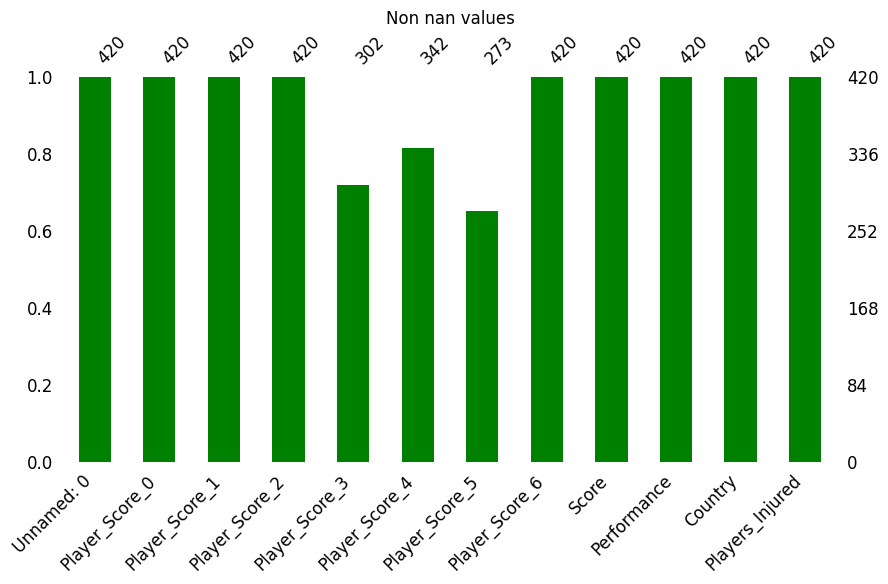

In [401]:
missingno.bar(df_raw.iloc[:, :], color="green", figsize=(10, 5), fontsize=12)
plt.title('Non nan values')


Text(0.5, 1.0, 'Nan matrix')

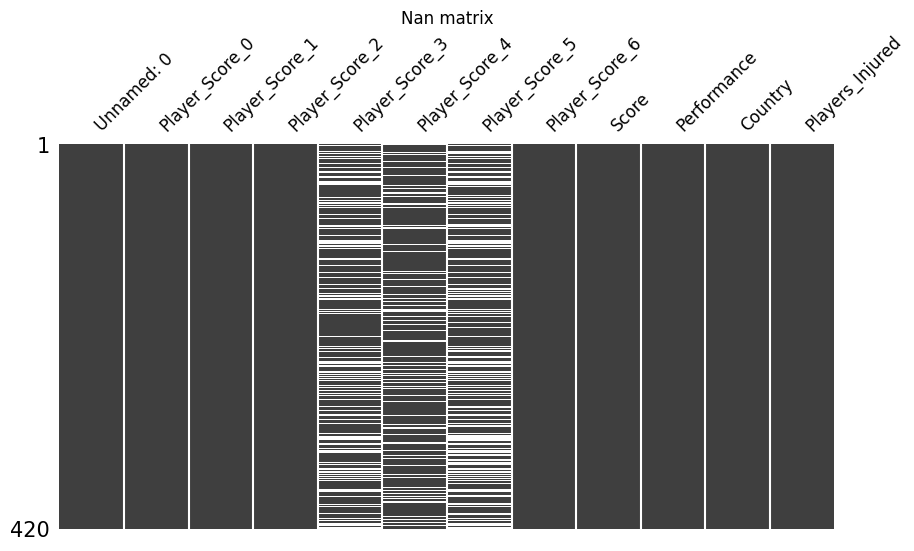

In [402]:
missingno.matrix(df_raw.iloc[:, :], figsize=(
    10, 5), fontsize=12, sparkline=False)

plt.title('Nan matrix')

<AxesSubplot: >

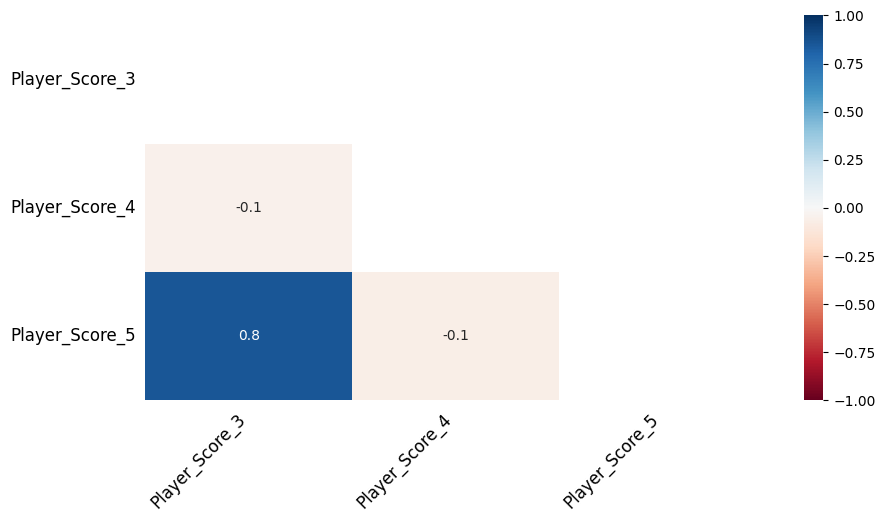

In [403]:
missingno.heatmap(df_raw.iloc[:, :8], figsize=(10, 5), fontsize=12)


Making a deep copy of the dataset and using different duplicate filling methods.

### Missing values with kNN

In [404]:
df = df_raw.copy(deep=True)
df.drop(columns=['Country', 'Performance', 'Unnamed: 0'], inplace=True)


knn_imp = KNNImputer(n_neighbors=3)
# fit and transform the imputer on the dataset
df_knn = pd.DataFrame(knn_imp.fit_transform(df), columns=df.columns)


In [405]:
df_knn.isnull().sum()


Player_Score_0     0
Player_Score_1     0
Player_Score_2     0
Player_Score_3     0
Player_Score_4     0
Player_Score_5     0
Player_Score_6     0
Score              0
Players_Injured    0
dtype: int64

### Plots of before and after

<AxesSubplot: ylabel='Density'>

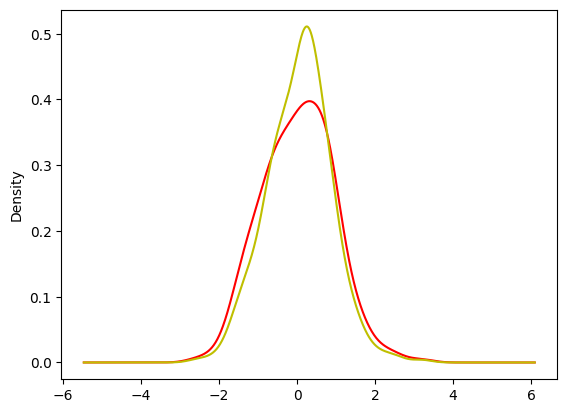

In [406]:
df['Player_Score_3'].plot.kde(color='r')
df_knn["Player_Score_3"].plot.kde(color='y')


<AxesSubplot: ylabel='Density'>

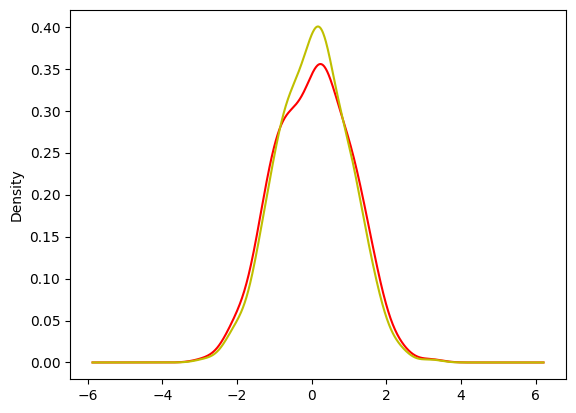

In [407]:
df['Player_Score_4'].plot.kde(color='r')
df_knn["Player_Score_4"].plot.kde(color='y')


<AxesSubplot: ylabel='Density'>

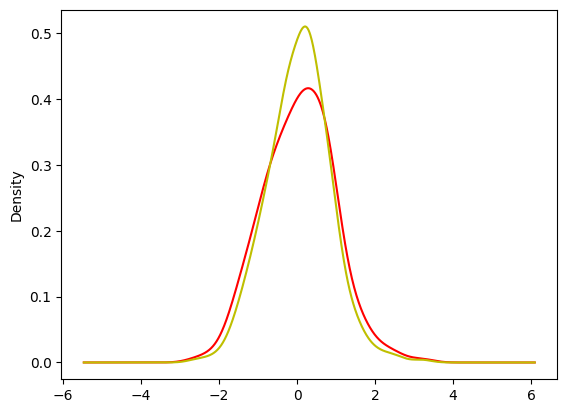

In [408]:
df['Player_Score_5'].plot.kde(color='r')
df_knn["Player_Score_5"].plot.kde(color='y')


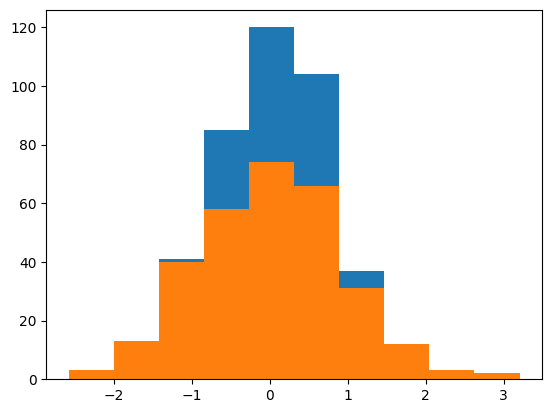

In [409]:
# calculating the jensenshannon distance between the probability distributions before and after imputation

counts_imputed, nins_imputed, values_imputed = plt.hist(
    df_knn["Player_Score_3"])
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts, nins, values = plt.hist(df["Player_Score_3"])
counts_probabilities = counts / counts.sum()

# pdf distance calculation
knn3_distance = distance.jensenshannon(counts_imputed_probabilities, counts_probabilities)


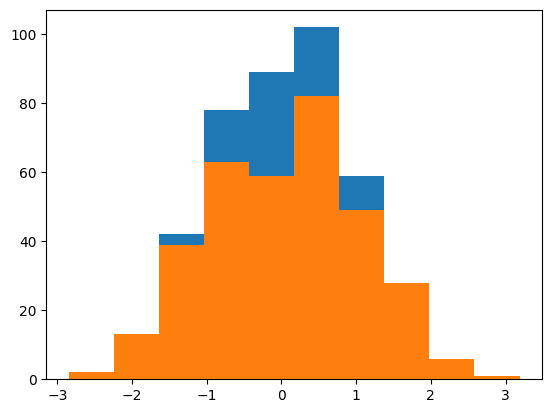

In [410]:
# calculating the jensenshannon distance between the probability distributions before and after imputation

counts_imputed, nins_imputed, values_imputed = plt.hist(
    df_knn["Player_Score_4"])
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts, nins, values = plt.hist(df["Player_Score_4"])
counts_probabilities = counts / counts.sum()

# pdf distance calculation
knn4_distance = distance.jensenshannon(counts_imputed_probabilities, counts_probabilities)


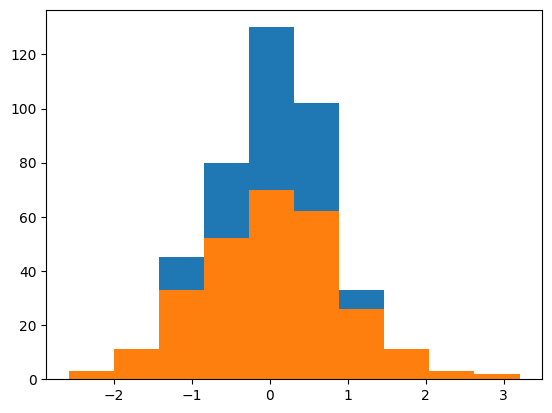

In [411]:
# calculating the jensenshannon distance between the probability distributions before and after imputation

counts_imputed, nins_imputed, values_imputed = plt.hist(
    df_knn["Player_Score_5"])
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts, nins, values = plt.hist(df["Player_Score_5"])
counts_probabilities = counts / counts.sum()

# pdf distance calculation
knn5_distance = distance.jensenshannon(counts_imputed_probabilities, counts_probabilities)


### Missing values with Regression

In [412]:
# Choosing the columns without nan values to impute Player_Score_5.
df_regr5 = df_raw[['Player_Score_0', 'Player_Score_1',
                   'Player_Score_2', 'Player_Score_5', 'Player_Score_6']]


lr_model = LinearRegression()


train_data = df_regr5[df_regr5['Player_Score_5'].isnull() == False]
test_data = df_regr5[df_regr5['Player_Score_5'].isnull() == True]

ps_5_before_imp = train_data['Player_Score_5']

y = train_data['Player_Score_5']  # target is "Player_Score_5"
train_data.drop("Player_Score_5", axis=1, inplace=True)
# features are all other features except "Player_Score_5"

lr_model.fit(train_data, y)

test_data.drop("Player_Score_5", axis=1, inplace=True)

# infer the missing values with the learned model
pred = lr_model.predict(test_data)
test_data['Player_Score_5'] = pred

ps_5_lr = ps_5_before_imp.append(test_data['Player_Score_5'])


In [413]:
# Choosing the columns without nan values to impute Player_Score_4.
df_regr4 = df_raw[['Player_Score_0', 'Player_Score_1',
                   'Player_Score_2', 'Player_Score_4', 'Player_Score_6']]


lr_model = LinearRegression()


train_data = df_regr4[df_regr4['Player_Score_4'].isnull() == False]
test_data = df_regr4[df_regr4['Player_Score_4'].isnull() == True]

ps_4_before_imp = train_data['Player_Score_4']

y = train_data['Player_Score_4']  # target is "Player_Score_4"
train_data.drop("Player_Score_4", axis=1, inplace=True)
# features are all other features except "Player_Score_4"

lr_model.fit(train_data, y)

test_data.drop("Player_Score_4", axis=1, inplace=True)

# infer the missing values with the learned model
pred = lr_model.predict(test_data)
test_data['Player_Score_4'] = pred

ps_4_lr = ps_4_before_imp.append(test_data['Player_Score_4'])


In [414]:
# Choosing the columns without nan values to impute Player_Score_3.
df_regr3 = df_raw[['Player_Score_0', 'Player_Score_1',
                   'Player_Score_2', 'Player_Score_3', 'Player_Score_6']]

lr_model = LinearRegression()


train_data = df_regr3[df_regr3['Player_Score_3'].isnull() == False]
test_data = df_regr3[df_regr3['Player_Score_3'].isnull() == True]

ps_3_before_imp = train_data['Player_Score_3']

y = train_data['Player_Score_3']  # target is "Player_Score_3"
train_data.drop("Player_Score_3", axis=1, inplace=True)
# features are all other features except "Player_Score_3"

lr_model.fit(train_data, y)

test_data.drop("Player_Score_3", axis=1, inplace=True)

# infer the missing values with the learned model
pred = lr_model.predict(test_data)
test_data['Player_Score_3'] = pred

ps_3_lr = ps_3_before_imp.append(test_data['Player_Score_3'])


<AxesSubplot: ylabel='Density'>

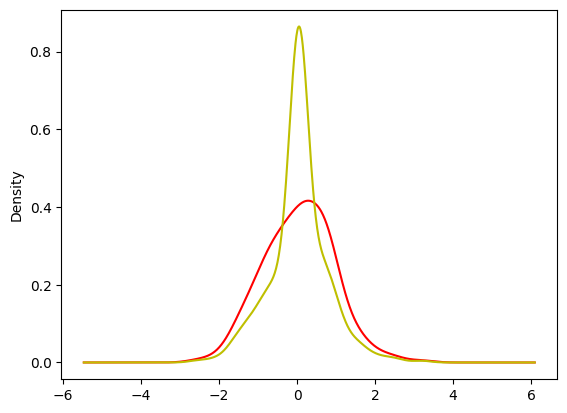

In [415]:
# visualising the distribution before and after imputation

# plotting the pdf after imputation
df_regr5['Player_Score_5'].plot.kde(color='r')

# plotting the pdf before imputation
ps_5_lr.plot.kde(color='y')


<AxesSubplot: ylabel='Density'>

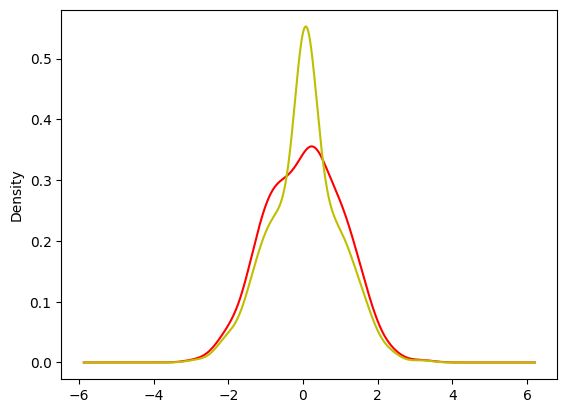

In [416]:
# visualising the distribution before and after imputation

# plotting the pdf after imputation
df_regr4['Player_Score_4'].plot.kde(color='r')

# plotting the pdf before imputation
ps_4_lr.plot.kde(color='y')


<AxesSubplot: ylabel='Density'>

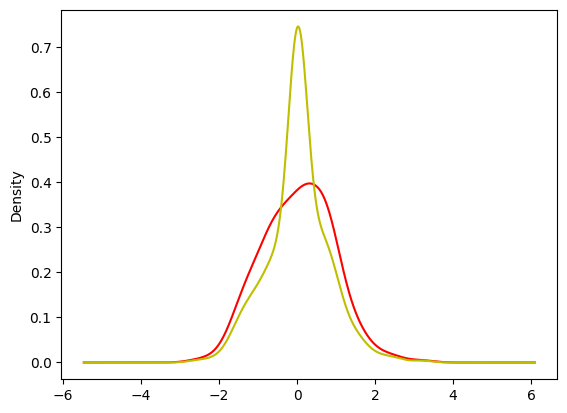

In [417]:
# visualising the distribution before and after imputation

# plotting the pdf after imputation
df_regr3['Player_Score_3'].plot.kde(color='r')

# plotting the pdf before imputation
ps_3_lr.plot.kde(color='y')


Checking both algorithms and choosing the best one

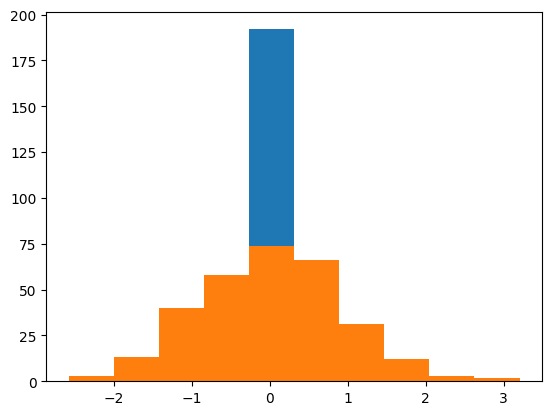

In [418]:
# calculating the jensenshannon distance between the probability distributions before and after imputation
# probability distribution after imputation
counts_imputed, nins_imputed, values_imputed = plt.hist(ps_3_lr)
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts, nins, values = plt.hist(ps_3_before_imp)
counts_probabilities = counts / counts.sum()

# pdf distance calculation
lr3_distance = distance.jensenshannon(counts_imputed_probabilities, counts_probabilities)


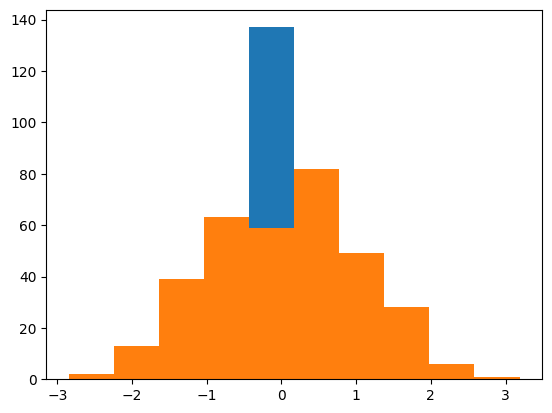

In [419]:
# calculating the jensenshannon distance between the probability distributions before and after imputation
# probability distribution after imputation
counts_imputed, nins_imputed, values_imputed = plt.hist(ps_4_lr)
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts, nins, values = plt.hist(ps_4_before_imp)
counts_probabilities = counts / counts.sum()

# pdf distance calculation
lr4_distance = distance.jensenshannon(counts_imputed_probabilities, counts_probabilities)


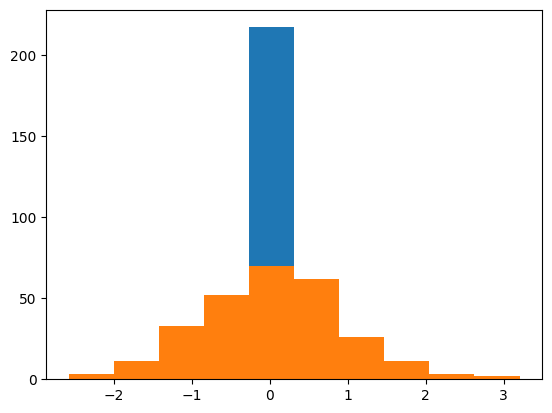

In [420]:
# calculating the jensenshannon distance between the probability distributions before and after imputation
# probability distribution after imputation
counts_imputed, nins_imputed, values_imputed = plt.hist(ps_5_lr)
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts, nins, values = plt.hist(ps_5_before_imp)
counts_probabilities = counts / counts.sum()

# pdf distance calculation
lr5_distance = distance.jensenshannon(counts_imputed_probabilities, counts_probabilities)


In [421]:
# Distance for all
distancelr = [lr3_distance,lr4_distance,lr5_distance]
distanceknn = [knn3_distance,knn4_distance,knn5_distance]

for i in range(3):
    print(f'Player Score {i+3} lr distance: {distancelr[i]}')
for i in range(3):
    print(f'Player Score {i+3} knn distance: {distanceknn[i]}')

Player Score 3 lr distance: 0.15804035497765384
Player Score 4 lr distance: 0.12638514073792098
Player Score 5 lr distance: 0.19037973174084133
Player Score 3 knn distance: 0.0645205517780904
Player Score 4 knn distance: 0.04416420089753926
Player Score 5 knn distance: 0.06357975816122968


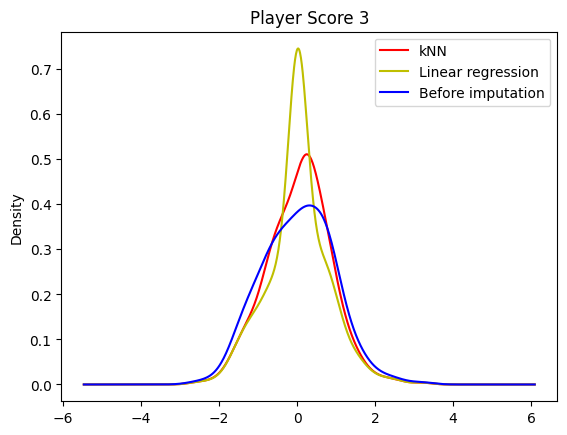

In [422]:
# plotting the pdf after imputation using knn
df_knn['Player_Score_3'].plot.kde(color='r', label= 'kNN')

# plotting the pdf before imputation using linear regression
ps_3_lr.plot.kde(color='y', label= 'Linear regression')

# plotting the pdf before imputation without imputation
ps_3_before_imp.plot.kde(color='b', label= 'Before imputation')
plt.title('Player Score 3')
plt.legend()



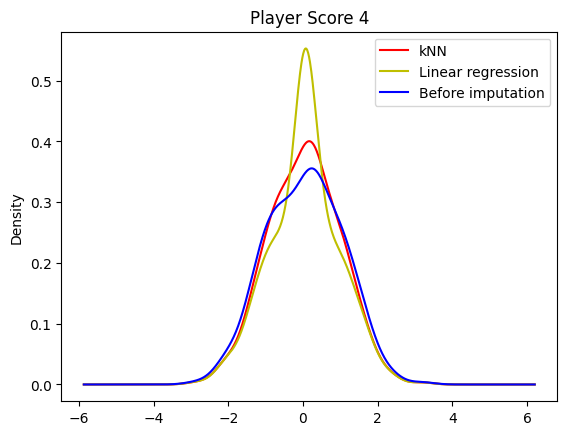

In [423]:
# plotting the pdf after imputation using knn
df_knn['Player_Score_4'].plot.kde(color='r', label= 'kNN')

# plotting the pdf before imputation using linear regression
ps_4_lr.plot.kde(color='y', label= 'Linear regression')

# plotting the pdf before imputation without imputation
ps_4_before_imp.plot.kde(color='b', label= 'Before imputation')
plt.title('Player Score 4')
plt.legend()



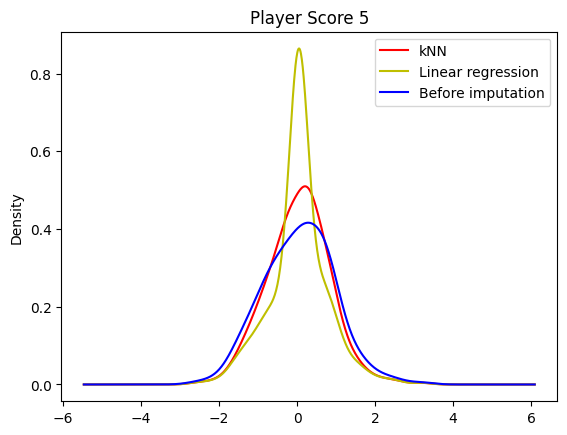

In [424]:
# plotting the pdf after imputation using knn
df_knn['Player_Score_5'].plot.kde(color='r', label= 'kNN')

# plotting the pdf before imputation using linear regression
ps_5_lr.plot.kde(color='y', label= 'Linear regression')

# plotting the pdf before imputation without imputation
ps_5_before_imp.plot.kde(color='b', label= 'Before imputation')
plt.title('Player Score 5')
plt.legend()



## 2. Linear Regression

### (a) Verify the features values distribution of the numerical variables

In [425]:
df_knn.describe()


,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Players_Injured
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,0.018029,-0.019279,-0.026326,0.056618,0.036992,0.043796,0.007360,99.437096,1.069048
std,0.991446,1.015430,0.998646,0.823813,0.953484,0.807093,0.964629,74.289233,1.025914
min,-3.318200,-3.713800,-2.763500,-2.576800,-2.848700,-2.576800,-3.001200,0.243600,0.000000
25%,-0.615950,-0.733750,-0.737325,-0.500150,-0.638017,-0.469875,-0.637350,44.284150,0.000000
50%,0.020900,-0.017650,-0.022650,0.142200,0.084317,0.119117,-0.020550,82.830650,1.000000
75%,0.726925,0.632525,0.666100,0.570325,0.690150,0.542500,0.629700,139.404300,2.000000
max,3.642700,2.907900,3.234600,3.205500,3.187300,3.205500,3.071400,367.257300,5.000000


array([[<AxesSubplot: title={'center': 'Player_Score_0'}>,
        <AxesSubplot: title={'center': 'Player_Score_1'}>,
        <AxesSubplot: title={'center': 'Player_Score_2'}>],
       [<AxesSubplot: title={'center': 'Player_Score_3'}>,
        <AxesSubplot: title={'center': 'Player_Score_4'}>,
        <AxesSubplot: title={'center': 'Player_Score_5'}>],
       [<AxesSubplot: title={'center': 'Player_Score_6'}>,
        <AxesSubplot: title={'center': 'Score'}>,
        <AxesSubplot: title={'center': 'Players_Injured'}>]], dtype=object)

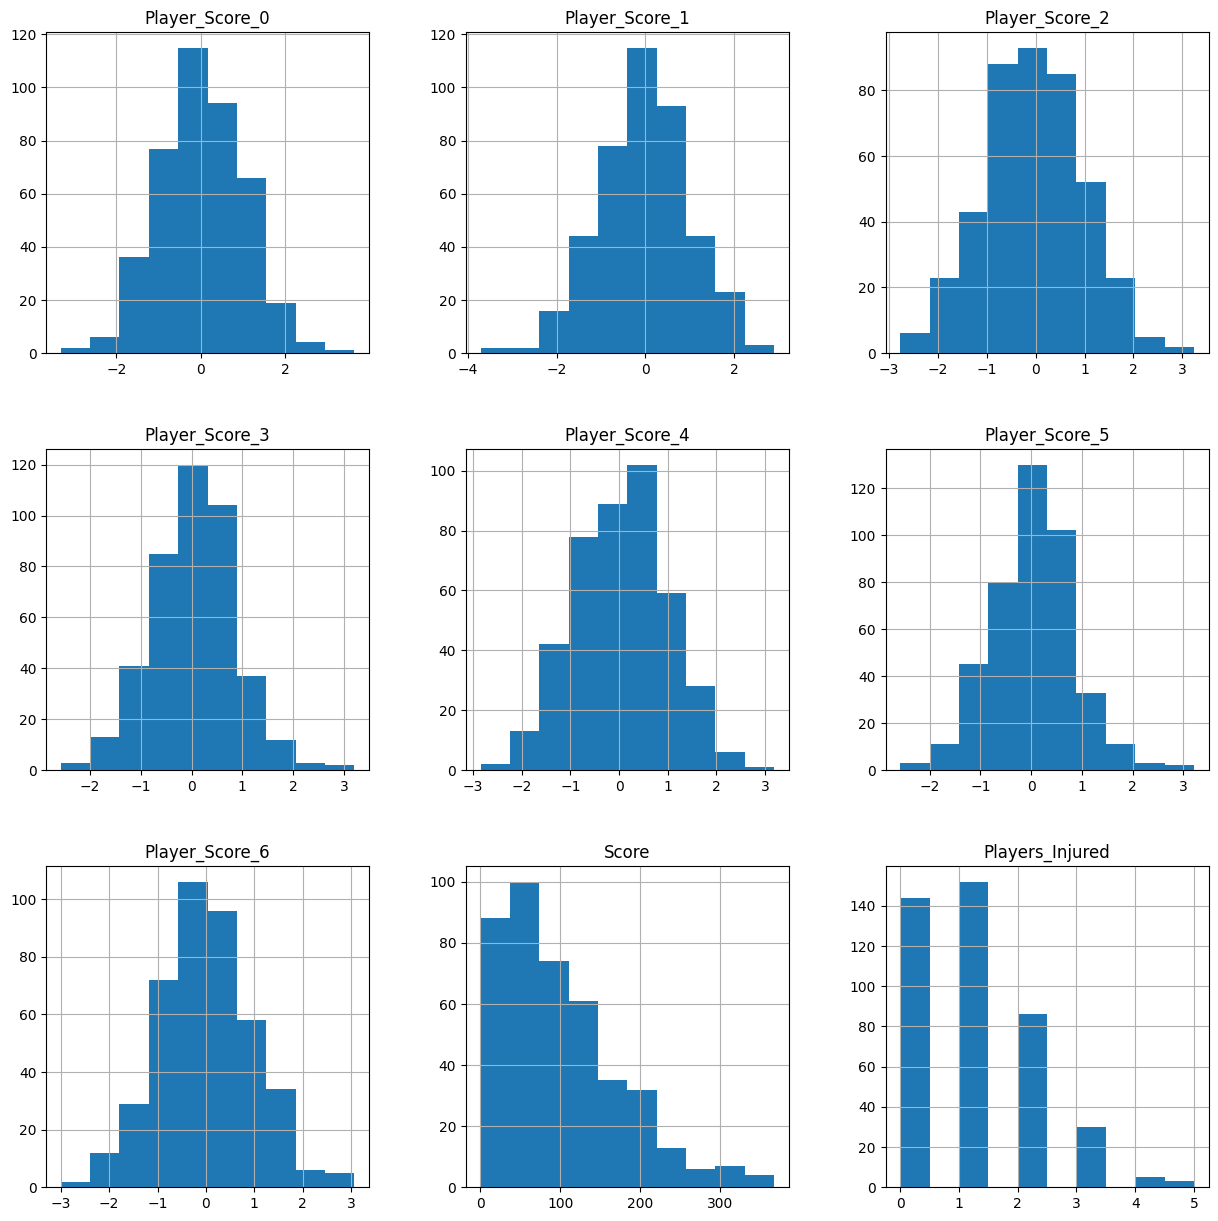

In [426]:
df_knn.iloc[:, :].hist(figsize=(15, 15))


In [427]:
def hist_df(data, rows_max, cols_max):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    row = 1
    col = 1
    fig = make_subplots(rows=rows_max, cols=cols_max)
    for i in data.columns:
        if row == rows_max:
            fig.append_trace(go.Histogram(x=data[i], name=i), row=row, col=col)
            col += 1
            row = 1
            continue
        fig.append_trace(go.Histogram(x=data[i], name=i), row=row, col=col)
        row += 1

    fig.show()


hist_df(df_knn, rows_max=2, cols_max=6)


### (b) Is features transformation necessary for the numerical variables? Let’s take into account that we are preparing the dataset for a Linear Regression task, with the goal of building a "Score" predictive model. If transformation is necessary, after justifying your choices, do proceed as described.

In [428]:
numerical_features = ['Player_Score_0', 'Player_Score_1', 'Player_Score_2',
                      'Player_Score_3', 'Player_Score_4', 'Player_Score_5', 'Player_Score_6', 'Score']


df_scaled = df_knn[numerical_features]
transformer = RobustScaler().fit(df_scaled)
transformer.transform(df_scaled)


array([[-2.33305408e-01, -2.70406763e-01,  6.08760710e-01, ...,
         8.58212948e-02, -1.75091749e-01,  7.86899516e-04],
       [ 8.78711719e-02,  2.80726794e-01,  4.11386430e-01, ...,
         4.23097502e-03,  9.44516791e-01, -5.82892794e-01],
       [ 6.73108070e-01, -1.71008765e+00,  6.09829524e-01, ...,
        -1.88286620e-01, -6.12248925e-01, -4.06627828e-02],
       ...,
       [-3.52154892e-01,  5.74188944e-02, -6.83862693e-01, ...,
         7.92180105e-01, -7.36750720e-02, -3.37476865e-01],
       [ 2.78506935e-01, -5.39056925e-02,  4.02942801e-02, ...,
        -4.47544964e-01,  7.67530879e-02, -7.51121082e-01],
       [ 1.29676999e+00,  6.52394284e-01, -6.12964711e-01, ...,
         5.24344569e-02,  2.96791760e-01, -6.70004726e-01]])

In [429]:
hist_df(df_scaled, 2, 6)


### (c) Verify the presence of outliers and eventually handle them. Justify your choices.

In [430]:
for i in df_scaled.columns:
    # discovering outliers with IQR-score
    Q1 = df_scaled[i].quantile(0.05)
    Q3 = df_scaled[i].quantile(0.95)
    IQR = Q3 - Q1
    print(IQR)

    # DROP
    logical_index_not_outliers = (df_scaled[i] > (
        Q1 - 1.5 * IQR)) & (df_scaled[i] < (Q3 + 1.5 * IQR))
    df_scaled = df_scaled[logical_index_not_outliers]
    # CAP
    df_scaled.loc[(df_scaled[i] < Q1), i] = Q1
    df_scaled.loc[(df_scaled[i] > Q3), i] = Q3
df_scaled.shape


3.2376199999999975
3.3141299999999987
3.300774999999999
2.6930316666666663
3.040801666666666
2.595353333333331
3.2383649999999995
235.73340999999996


(420, 8)

There are no outliers to be handled since the robust scaling handled them, hence nothing was dropped

### (d) Is encoding necessary for the categorical variables? If yes, which kind of encoding? Specify your choices, justify them and perform categorical data encoding, if necessary.

In [431]:
# encode using sklearn
df_scaled['Country'] = df_raw['Country']
df_scaled['Performance'] = df_raw['Performance']


In [432]:
# Replace a categorical value with a specific numeric one
dictionary = {"Performance": {'below_average': 0, 'neutral': 1,
                              'average': 2, 'above_average': 3, 'extraordinary': 4}}
df_scaled.replace(dictionary, inplace=True)
# Replace a categorical value with a specific numeric one
dictionary = {'France': 0, 'Finland': 1, 'Germany': 2,
              'Norway': 3, 'Switzerland': 4, 'The_Netherlands': 5, 'Italy': 6}
df_scaled.replace(dictionary, inplace=True)

display(df_scaled)


,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Country,Performance
0,-0.29240,-0.38710,0.83170,0.206000,0.914267,0.206000,-0.242400,82.9055,0,0
1,0.13890,0.36590,0.55470,0.123400,0.624000,0.123400,1.176200,27.3858,1,0
2,0.92480,-1.69945,0.83320,-0.071500,0.190500,-0.071500,-0.796300,78.9628,2,1
3,-0.48300,0.23040,-1.07530,-0.074400,-1.117500,-0.074400,-1.622150,80.2715,1,0
4,-0.63340,1.33540,1.61592,-0.314200,-0.791300,-0.314200,-0.084600,102.4383,3,2
...,...,...,...,...,...,...,...,...,...,...
415,-1.61189,-0.21950,1.61592,-0.138500,0.971600,-0.138500,-0.212800,114.0887,4,0
416,0.14580,-0.06000,-0.14490,-0.138433,-0.103067,-0.138433,1.616215,21.9961,1,3
417,-0.45200,0.06080,-0.98240,0.921100,1.517600,0.921100,-0.113900,50.7298,6,1
418,0.39490,-0.09130,0.03390,-0.333967,0.758600,-0.333967,0.076700,11.3839,2,4


### (e) Increase the dimensionality of the dataset introducing Polynomial Features – degree = 3 (continuous variables)

In [433]:
numerical_features = ['Player_Score_0', 'Player_Score_1', 'Player_Score_2',
                      'Player_Score_3', 'Player_Score_4', 'Player_Score_5', 'Player_Score_6']

df_dimensionality = df_scaled[numerical_features].copy(deep=True)
df_dimensionality


,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6
0,-0.29240,-0.38710,0.83170,0.206000,0.914267,0.206000,-0.242400
1,0.13890,0.36590,0.55470,0.123400,0.624000,0.123400,1.176200
2,0.92480,-1.69945,0.83320,-0.071500,0.190500,-0.071500,-0.796300
3,-0.48300,0.23040,-1.07530,-0.074400,-1.117500,-0.074400,-1.622150
4,-0.63340,1.33540,1.61592,-0.314200,-0.791300,-0.314200,-0.084600
...,...,...,...,...,...,...,...
415,-1.61189,-0.21950,1.61592,-0.138500,0.971600,-0.138500,-0.212800
416,0.14580,-0.06000,-0.14490,-0.138433,-0.103067,-0.138433,1.616215
417,-0.45200,0.06080,-0.98240,0.921100,1.517600,0.921100,-0.113900
418,0.39490,-0.09130,0.03390,-0.333967,0.758600,-0.333967,0.076700


In [434]:

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(df_dimensionality)
X_poly = poly.transform(df_dimensionality)


In [435]:
df_scaled['Performance'] = df_scaled['Performance'].astype('float64')
df_scaled.dtypes


Player_Score_0     float64
Player_Score_1     float64
Player_Score_2     float64
Player_Score_3     float64
Player_Score_4     float64
Player_Score_5     float64
Player_Score_6     float64
Score              float64
Country           category
Performance        float64
dtype: object

### (f) Eventually include any other transformation which might be necessary/appropriate and justify your choices.

## 3. Features Selection

### (a) Perform One Way ANOVA and test the relationship between variable Country and Score. Eventually, consider the possibility to remove the feature. Justify your choice.

In [436]:
groups = pd.unique(df_scaled.Country.values)
groups


[0, 1, 2, 3, 4, 5, 6]
Categories (7, int64): [1, 0, 2, 6, 3, 4, 5]

In [437]:
groups = pd.unique(df_scaled.Country.values)
d_data = {grp: df_scaled['Score'][df_scaled.Country == grp] for grp in groups}


95% confidence test

In [438]:
# Using scipy f_oneway to calculate the p value
# 'France':0, 'Finland':1, 'Germany':2, 'Norway':3, 'Switzerland':4, 'The_Netherlands':5, 'Italy':6
from scipy import stats
Fcritical = 3.179
F, p = stats.f_oneway(d_data[0], d_data[1], d_data[2],
                      d_data[3], d_data[4], d_data[5], d_data[6])


In [439]:
if F > Fcritical:
    print("reject null hypothesis H0")
else:
    print("accept null hypothesis H0")


accept null hypothesis H0


We accept the null hypothesis meaning that it doesn't exist variance between the groups, I won't include this feature for model training.

In [440]:
df_model = df_scaled.copy(deep=True)


### (b) Perform Features Selection and visualize the features which have been selected. Select one appropriate methodology for features selection and justify your choice.

In [441]:
df_train = df_model.copy(deep=True)
df_train.drop(columns='Score', inplace=True)
y = df_model['Score'].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(
    df_train, y, random_state=23102002, test_size=.5)


In [442]:
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
y_train = y_train.astype('int')
# transform train set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (210, 9)
X_train_selected.shape: (210, 4)


[ True  True  True False False  True False False False]


([], [])

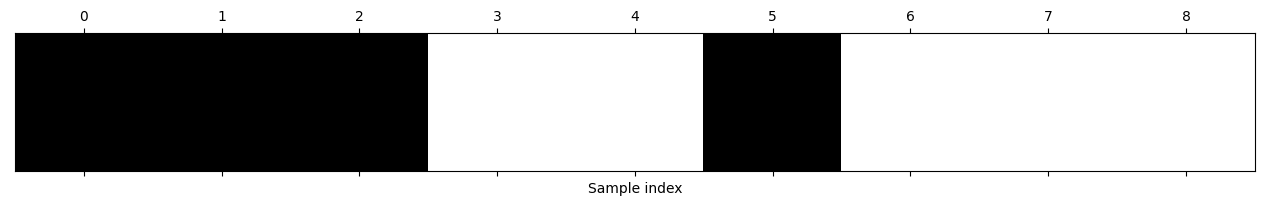

In [443]:
mask = select.get_support()

print(mask)

# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())


In [444]:
df_train = df_model.copy(deep=True)
df_train.drop(columns='Score', inplace=True)
y = df_model['Score'].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(
    df_train, y, random_state=23102002, test_size=.5)


In [445]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(k=6)  # Select features according to the k highest score
fit = k_best.fit(X_train, y_train)

# transform training set
X_train_selected = k_best.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (210, 9)
X_train_selected.shape: (210, 6)


[ True  True  True False  True  True False  True False]


([], [])

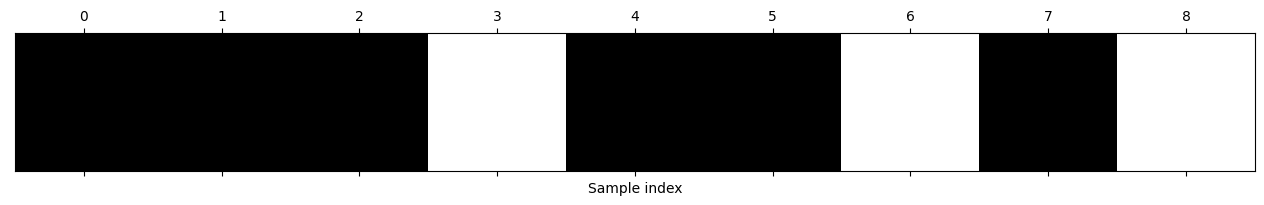

In [446]:
mask = k_best.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())


Won't use this feature selection method because it's not really useful for the amount of features we have and I think we will need most of the features present in the dataset

In [447]:
df_train = df_model.copy(deep=True)
df_train.drop(columns='Score', inplace=True)
y = df_model['Score'].copy(deep=True).astype('int')
X_train, X_test, y_train, y_test = train_test_split(
    df_train, y, random_state=23102002, test_size=.5)


In [448]:
select = SelectFromModel(RandomForestClassifier(
    n_estimators=100, random_state=24))


In [449]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))


X_train.shape: (210, 9)
X_train_l1.shape: (210, 7)


Text(0.5, 1.0, 'Model Selection with RFC')

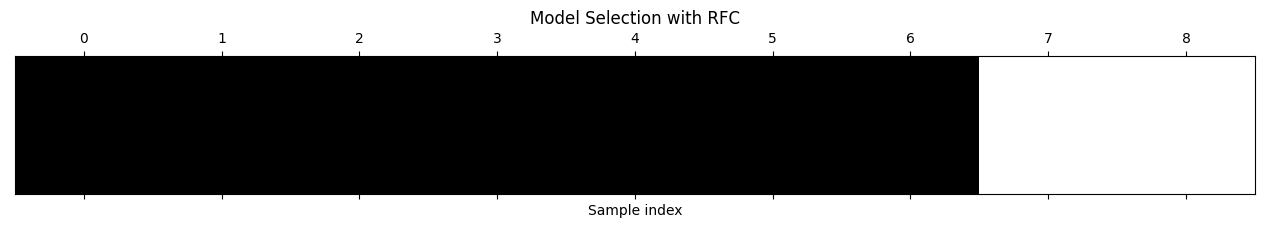

In [450]:
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.title('Model Selection with RFC')



In [451]:
df_train = df_model.copy(deep=True)
df_train.drop(columns='Score', inplace=True)
y = df_model['Score'].copy(deep=True).astype('int')
X_train, X_test, y_train, y_test = train_test_split(
    df_train, y, random_state=23102002, test_size=.5)


Text(0.5, 1.0, 'RFE')

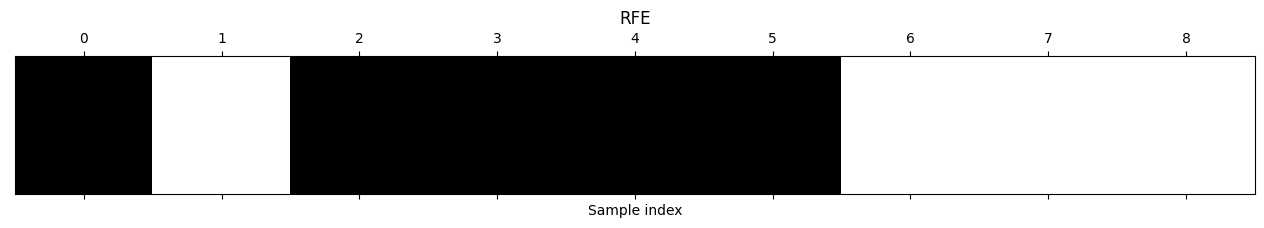

In [452]:
# RFE=Feature ranking with recursive feature elimination.

select = RFE(RandomForestClassifier(n_estimators=100,
             random_state=24), n_features_to_select=5)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()  # mask of selected features
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.title('RFE')


## 4. Linear Regression

In [453]:
from scipy import stats


def gradient_descent_2(eta, X, Y, numIterations):
    s = X.shape[0]
    theta = np.ones(10)
    X_transpose = X.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - Y
        gradient = np.dot(X_transpose, loss) / s
        theta = theta - eta * gradient

        y_predict = theta[0] + theta[1]*X_train
        plt.plot(X_train, y_predict, 'r')

    return theta


In [454]:
final_rmse = []


### (a) Train a Multiple Linear Regression model, using the Sklearn implementation of Linear Regression to find the best 𝜽 vector. Use all the transformed features, excluding the derived polynomial features. Evaluate the model with the learned 𝜽 on the test set.


In [455]:
df_train = df_model.copy(deep=True)
df_train.drop(columns='Score', inplace=True)
y = df_model['Score'].copy(deep=True)

X_train, X_test, y_train, y_test = train_test_split(
    df_train, y, random_state=24)


In [456]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
print("Intercept={}, Slope={}".format(lin_reg.intercept_, lin_reg.coef_))
y_predict = lin_reg.predict(X_test)


Intercept=87.69643208217602, Slope=[  2.84579472  -2.07489303   3.95147882  34.26342482  -4.28547712
 -42.34416263   1.59470542   1.61554065   3.01421527]


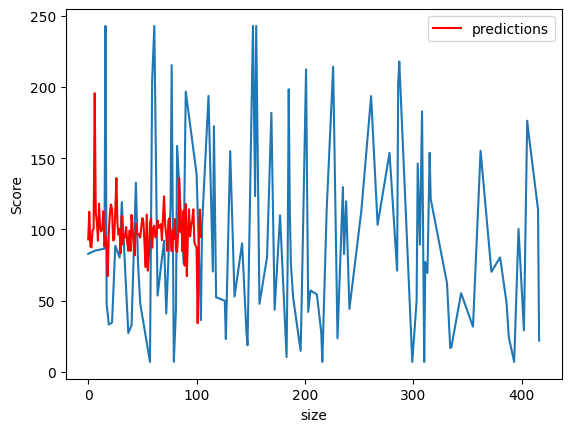

In [457]:
sns.lineplot(y_test)
sns.lineplot(y_predict, color='r', label="predictions")
plt.xlabel('index')
plt.ylabel('Score')
plt.legend()


In [458]:
print("test RMSE={}".format(np.sqrt(mean_squared_error(y_test, y_predict))))
print("test R2={}".format(r2_score(y_test, y_predict)))

print("train RMSE={}".format(
    np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train)))))
print("train R2={}".format(r2_score(y_train, lin_reg.predict(X_train))))

final_rmse.append({'Linear Regression test': np.sqrt(
    mean_squared_error(y_test, y_predict))})
final_rmse.append({'Linear Regression train': np.sqrt(
    mean_squared_error(y_train, lin_reg.predict(X_train)))})


test RMSE=66.78679659791713
test R2=-0.033550616190128
train RMSE=66.4131367390314
train R2=0.04970599069771997


### (b) Use all the transformed features, excluding the derived polynomial features, to identify the best values of 𝜽 by means of a Batch Gradient Descent procedure. Identify the best values of 𝜼 (starting with an initial value of 𝜼 = 0.1 ). Evaluate the model with the trained 𝜽 on the test set. Plot the train and the test error for increasing number of iterations of the Gradient Descent procedure (with the best value of 𝜼). Provide a comment of the plot.


In [459]:
df_train = df_model.copy(deep=True)
df_train.drop(columns='Score', inplace=True)
y = df_model['Score'].copy(deep=True)

X_train, X_test, y_train, y_test = train_test_split(
    df_train, y, random_state=24)


In [460]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]  # insert column


[ 73.49063997   4.52918968  -1.43481469   3.64453768   9.69304008
  -4.03425354 -16.2379212    0.71783944   3.84976761   5.72315393]


Text(0.5, 1.0, 'eta=0.1')

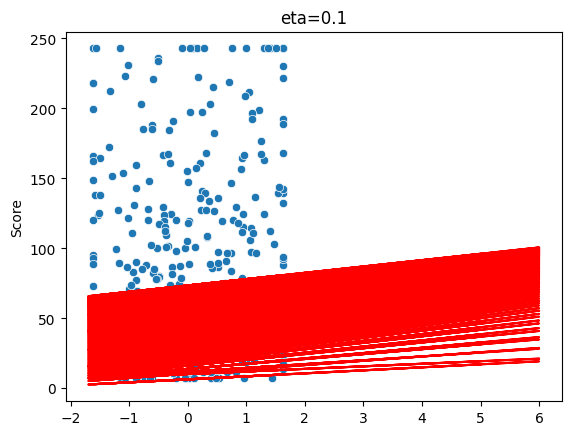

In [461]:
s, q = np.shape(X_train)
eta = 0.1  # learning rate
theta = gradient_descent_2(eta, X_train, y_train, 20)
print(theta)
sns.scatterplot(x=X_train[:, 1], y=y_train)
plt.title('eta=0.1')


[-2.64437654e+20 -9.20299045e+18  1.17782888e+19 -2.11957169e+18
 -1.95067342e+19 -5.83032736e+18 -1.34315734e+19  1.15114963e+19
 -1.05144062e+21 -5.60059946e+20]


Text(0.5, 1.0, 'eta=0.15')

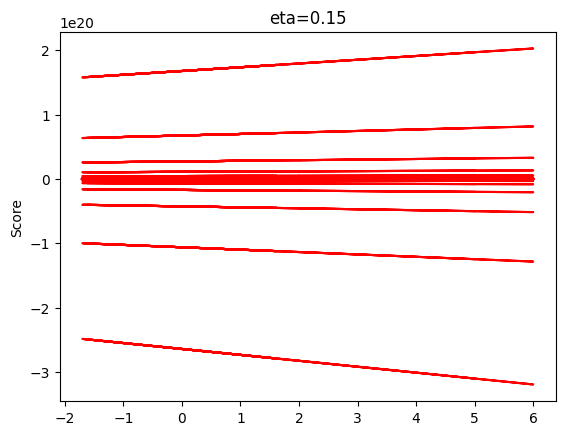

In [462]:
s, q = np.shape(X_train)
eta = 0.15  # learning rate
theta = gradient_descent_2(eta, X_train, y_train, 20)
print(theta)
sns.scatterplot(x=X_train[:, 1], y=y_train)
plt.title('eta=0.15')



[ 75.73295066   4.35399537  -1.54879097   3.70920505  10.69408031
  -4.0437337  -17.3567238    0.82167799   3.51696753   5.28327927]


Text(0.5, 1.0, 'eta=0.11')

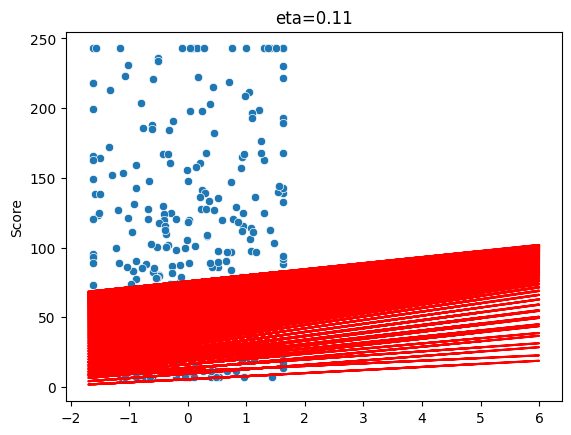

In [463]:
from scipy import stats

s, q = np.shape(X_train)
eta = 0.11  # learning rate
theta = gradient_descent_2(eta, X_train, y_train, 20)
print(theta)
sns.scatterplot(x=X_train[:, 1], y=y_train)
plt.title('eta=0.11')



### (c) Use the complete set of features, including the derived polynomial features. Train a Multiple Linear Regression model, using the Sklearn implementation of Linear Regression to find the best 𝜽 vector. Evaluate the model with the learned 𝜽 on the test set. Plot the train and the test error for increasing the size of the train-set (with the best value of 𝜼). Provide a comment of the plot.


In [495]:
df_train = df_model.copy(deep=True)
y = df_model['Score'].copy(deep=True)
df_train.drop(columns=['Score'], inplace=True)

df_poly = pd.DataFrame(X_poly)

df_new_train = pd.concat([df_poly, df_train], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    df_new_train, y, random_state=24)


In [496]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

<AxesSubplot: ylabel='Score'>

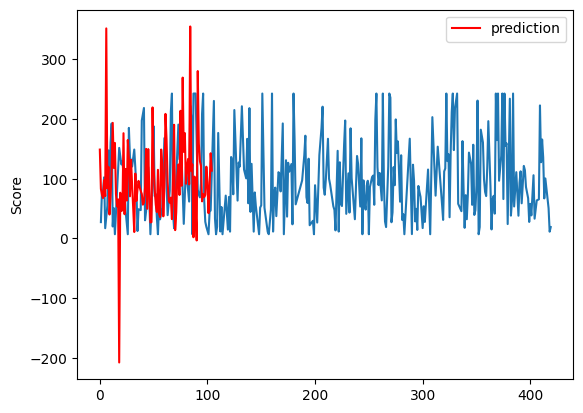

In [497]:
sns.lineplot(y_train)
sns.lineplot(lin_reg.predict(X_test), label='prediction', color='r')


In [498]:
def plot_learning_curves(model, X, y, model_type, c):

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=42)
    train_errors, test_errors = [], []

    for m in range(1, len(X_train)):

        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), 'b',
             linewidth=2, label="train_"+model_type)
    plt.plot(np.sqrt(test_errors), 'g', linewidth=3, label="test_"+model_type)


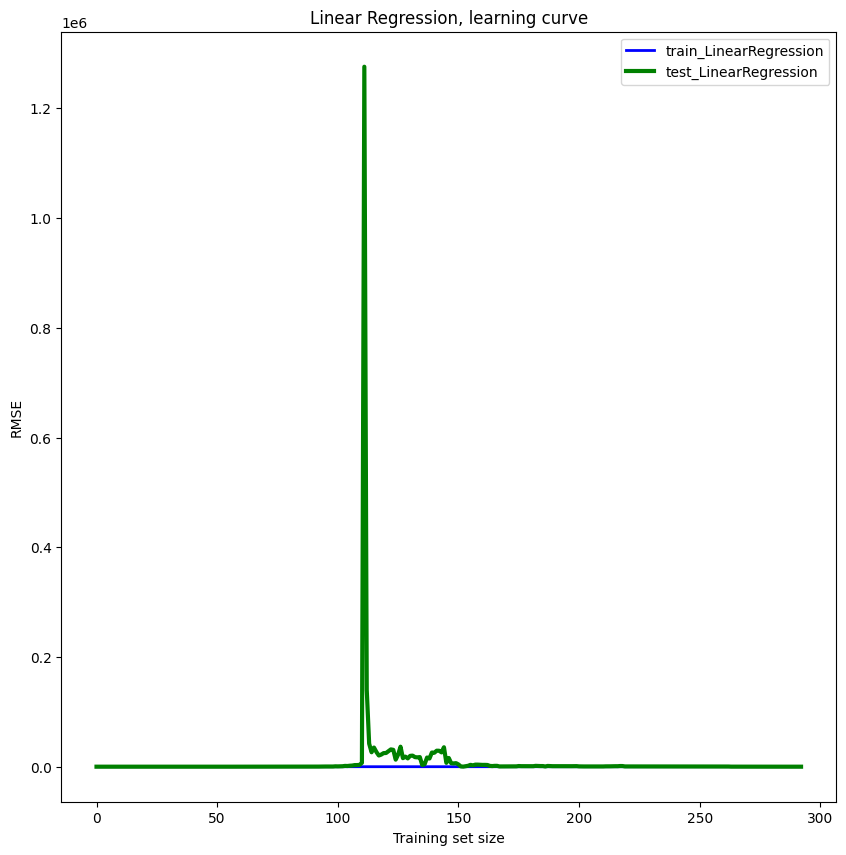

In [499]:
plt.figure(figsize=(10, 10))
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, df_new_train, y, "LinearRegression", 'g')
plt.title('Linear Regression, learning curve')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()


### (d) Use the complete set of features, including the derived polynomial features. Train a Ridge Regression model identifying the best value of the learning rate 𝜶 that allows the model to achieve the best generalization performances. Evaluate the model.


In [469]:
df_train = df_model.copy(deep=True)
y = df_model['Score'].copy(deep=True)
df_train.drop(columns=['Score'], inplace=True)

df_poly = pd.DataFrame(X_poly)

df_new_train = pd.concat([df_poly, df_train], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    df_new_train, y, random_state=24)


Alpha = 0.5, RMSE = 68.57355765624578
Alpha = 1, RMSE = 66.08425343185684
Alpha = 2, RMSE = 63.89800465881835
Alpha = 3, RMSE = 62.74148271985468
Alpha = 4, RMSE = 61.98714340426305
Alpha = 5, RMSE = 61.44688729410152
Alpha = 6, RMSE = 61.03751387174634
Alpha = 7, RMSE = 60.71506907685875
Alpha = 10, RMSE = 60.05489028113115
Alpha = 11, RMSE = 59.89901017830868
Alpha = 20, RMSE = 59.11985325118686
Alpha = 30, RMSE = 58.79375568047981
Alpha = 40, RMSE = 58.67351735210657
Alpha = 50, RMSE = 58.65254173109622
Alpha = 60, RMSE = 58.68747579419384
Alpha = 70, RMSE = 58.756424154661374
Alpha = 80, RMSE = 58.84683479110648
Alpha = 90, RMSE = 58.950916180405734
Alpha = 100, RMSE = 59.063572803085776
Alpha = 150, RMSE = 59.6651973264918
Alpha = 200, RMSE = 60.2360032374881
Minimum test-RMSE = 58.65254173109622


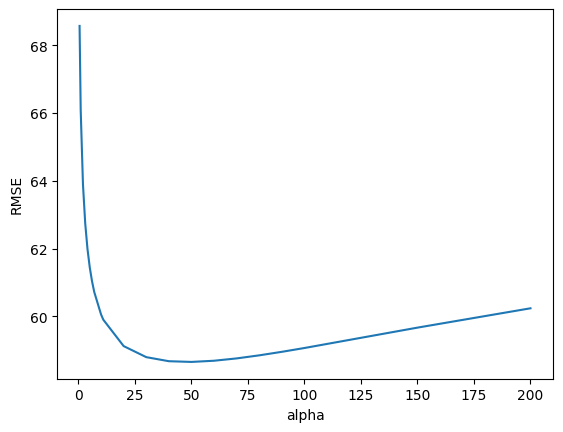

In [470]:
alphas = [0.5, 1, 2, 3, 4, 5, 6, 7, 10, 11,
          20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
rmse_values = []
rmse_values_train = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_predict = ridge_model.predict(X_test)
    rmse_values.append(np.sqrt(mean_squared_error(y_test, y_predict)))
    rmse_values_train.append(
        np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))))

plt.plot(alphas, rmse_values)
plt.xlabel('alpha')
plt.ylabel("RMSE")

for i, j in zip(alphas, rmse_values):
    print('Alpha = {}, RMSE = {}'.format(i, j))

print("Minimum test-RMSE = {}".format(np.min(rmse_values)))


final_rmse.append({'Ridge Regression test': np.min(rmse_values)})
final_rmse.append({'Ridge Regression train': np.min(rmse_values_train)})


### (e) Use the complete set of features, including the derived polynomial features. Train a Linear Regression model with Lasso regularization. Comment on the importance of each feature given the related trained parameter value of the trained model. Also, verify the number of features selected (related coefficient 𝜽 different from zero) with different values of 𝛼.


In [471]:
df_train = df_model.copy(deep=True)
y = df_model['Score'].copy(deep=True)
df_train.drop(columns=['Score'], inplace=True)

df_poly = pd.DataFrame(X_poly)

df_new_train = pd.concat([df_poly, df_train], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    df_new_train, y, random_state=24)


Alpha = 0.001, RMSE = 83.14460015202002
Alpha = 0.002, RMSE = 82.4688697498599
Alpha = 0.003, RMSE = 81.81210277966377
Alpha = 0.004, RMSE = 81.16805670963163
Alpha = 0.005, RMSE = 80.52912997267649
Alpha = 0.006, RMSE = 79.89589917287894
Alpha = 0.008, RMSE = 78.59684653506544
Alpha = 0.1, RMSE = 67.9762882887414
Alpha = 0.2, RMSE = 62.42722535216395
Alpha = 1, RMSE = 58.493782000869274
Alpha = 1.4, RMSE = 58.16557357345882
Alpha = 1.45, RMSE = 58.070995524105975
Alpha = 1.5, RMSE = 57.98369728972258
Alpha = 1.6, RMSE = 57.82541862758639
Alpha = 2, RMSE = 57.300048988152156
Alpha = 3, RMSE = 56.398550739245366
Minimum test-RMSE = 56.398550739245366


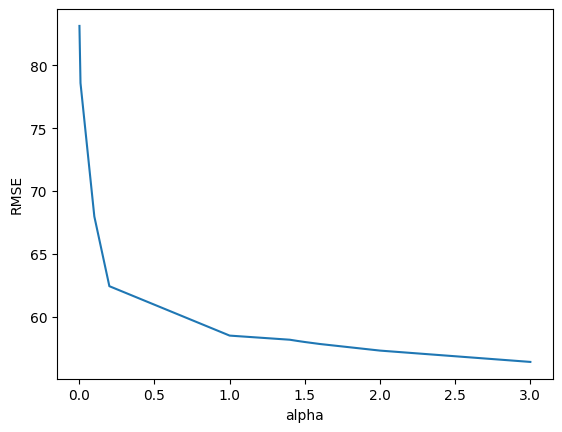

In [472]:
alphas = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,
          0.008, 0.1, 0.2, 1, 1.4, 1.45, 1.5, 1.6, 2, 3]
rmse_values = []
rmse_values_train = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_predict = lasso_model.predict(X_test)
    rmse_values.append(np.sqrt(mean_squared_error(y_test, y_predict)))
    rmse_values_train.append(
        np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))))

plt.plot(alphas, rmse_values)
plt.xlabel('alpha')
plt.ylabel("RMSE")

for i, j in zip(alphas, rmse_values):
    print('Alpha = {}, RMSE = {}'.format(i, j))

print("Minimum test-RMSE = {}".format(np.min(rmse_values)))

final_rmse.append({'Lasso Regression test': np.min(rmse_values)})
final_rmse.append({'Lasso Regression train': np.min(rmse_values_train)})


### (f) Use the subset of features selected in the Feature Selection task (question 3b). Train a Multiple Linear Regression model using the Sklearn implementation of Linear Regression to find the best 𝜽 vector. Evaluate the model.


In [473]:
df_train_features = df_model.copy(deep=True)
y = df_model['Score'].copy(deep=True)
df_train_features.drop(
    columns=['Score', 'Performance', 'Country'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    df_train_features, y, random_state=24)


In [474]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
print("Intercept={}, Slope={}".format(lin_reg.intercept_, lin_reg.coef_))

y_predict = lin_reg.predict(X_test)


Intercept=98.33718086257488, Slope=[  2.37943635  -2.70309786   4.18638494  34.91421874  -4.18983534
 -43.16588205   1.85651947]


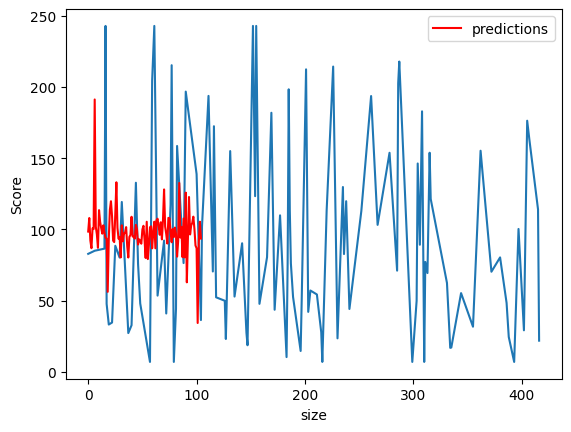

In [475]:
sns.lineplot(y_test)
sns.lineplot(y_predict, color='r', label="predictions")
plt.xlabel('size')
plt.ylabel('Score')
plt.legend()


In [476]:
print("test RMSE={}".format(np.sqrt(mean_squared_error(y_test, y_predict))))
print("test R2={}".format(r2_score(y_test, y_predict)))

print("train RMSE={}".format(
    np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train)))))
print("train R2={}".format(r2_score(y_train, lin_reg.predict(X_train))))


final_rmse.append({'Linear Regression features test': np.sqrt(
    mean_squared_error(y_test, y_predict))})
final_rmse.append({'Linear Regression features train': np.sqrt(
    mean_squared_error(y_train, lin_reg.predict(X_train)))})


test RMSE=66.0050336150932
test R2=-0.009496080255134487
train RMSE=66.61741320391856
train R2=0.04385108740699217


### (g) Create a table with the evaluation results obtained from all the models above on both the train and test sets.

In [492]:
def plot_learning_curves(model, X, y, model_type, c):

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=42)
    train_errors, test_errors = [], []

    for m in range(1, len(X_train)):

        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), 'b',
             linewidth=2, label="train_"+model_type)
    plt.plot(np.sqrt(test_errors), 'g', linewidth=3, label="test_"+model_type)


In [493]:
df_train = df_model.copy(deep=True)
y = df_model['Score'].copy(deep=True)
df_train.drop(columns=['Score'], inplace=True)

df_poly = pd.DataFrame(X_poly)

df_new_train = pd.concat([df_poly, df_train], axis=1).copy(deep=True)

X_train, X_test, y_train, y_test = train_test_split(
    df_train, y, random_state=24)


In [494]:
plt.figure(figsize=(10, 10))
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, df_train, y, "LinearRegression", 'g')
plt.title('Linear Regression, learning curve')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()


ValueError: X has 9 features, but LinearRegression is expecting 128 features as input.

<Figure size 1000x1000 with 0 Axes>

In [480]:
df_train = df_model.copy(deep=True)
y = df_model['Score'].copy(deep=True)
df_train.drop(columns=['Score'], inplace=True)

df_poly = pd.DataFrame(X_poly)

df_new_train = pd.concat([df_poly, df_train], axis=1).copy(deep=True)

X_train, X_test, y_train, y_test = train_test_split(
    df_new_train, y, random_state=24)


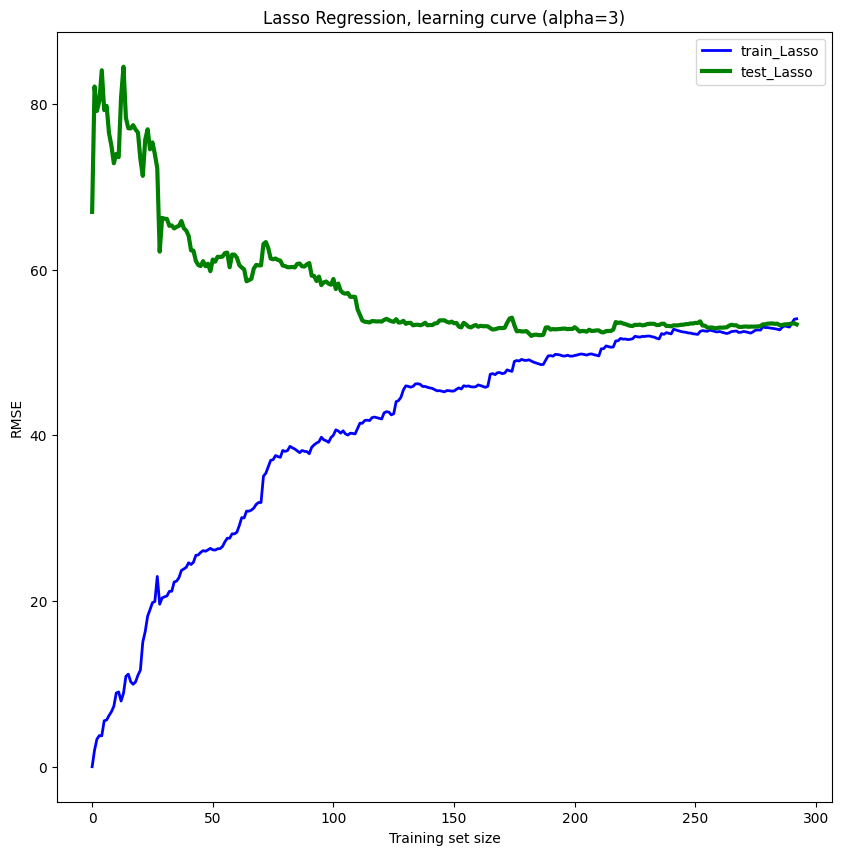

In [481]:
plt.figure(figsize=(10, 10))
lasso_reg = Lasso(alpha=3)
plot_learning_curves(lasso_reg, df_new_train, y, "Lasso", 'g')
plt.title('Lasso Regression, learning curve (alpha=3)')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()


In [482]:
df_train_features = df_model.copy(deep=True)
y = df_model['Score'].copy(deep=True)
df_train_features.drop(columns=['Score', 'Performance'], inplace=True)

df_poly = pd.DataFrame(X_poly)

df_new_train = pd.concat([df_poly, df_train_features], axis=1).copy(deep=True)

X_train, X_test, y_train, y_test = train_test_split(
    df_new_train, y, random_state=24)


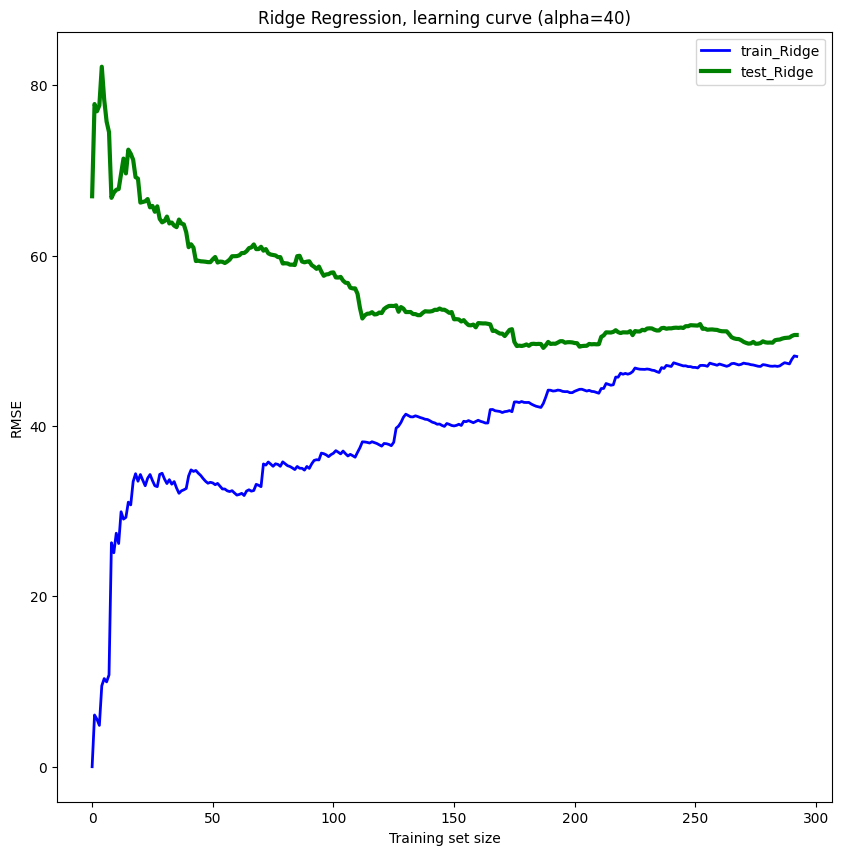

In [483]:
plt.figure(figsize=(10, 10))
ridge_reg = Ridge(alpha=40, solver="cholesky")
plot_learning_curves(ridge_reg, df_new_train, y, "Ridge", 'g')
plt.title('Ridge Regression, learning curve (alpha=40)')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()


In [484]:
df_train_features = df_model.copy(deep=True)
y = df_model['Score'].copy(deep=True)
df_train_features.drop(
    columns=['Score', 'Performance', 'Country'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    df_train_features, y, random_state=24)


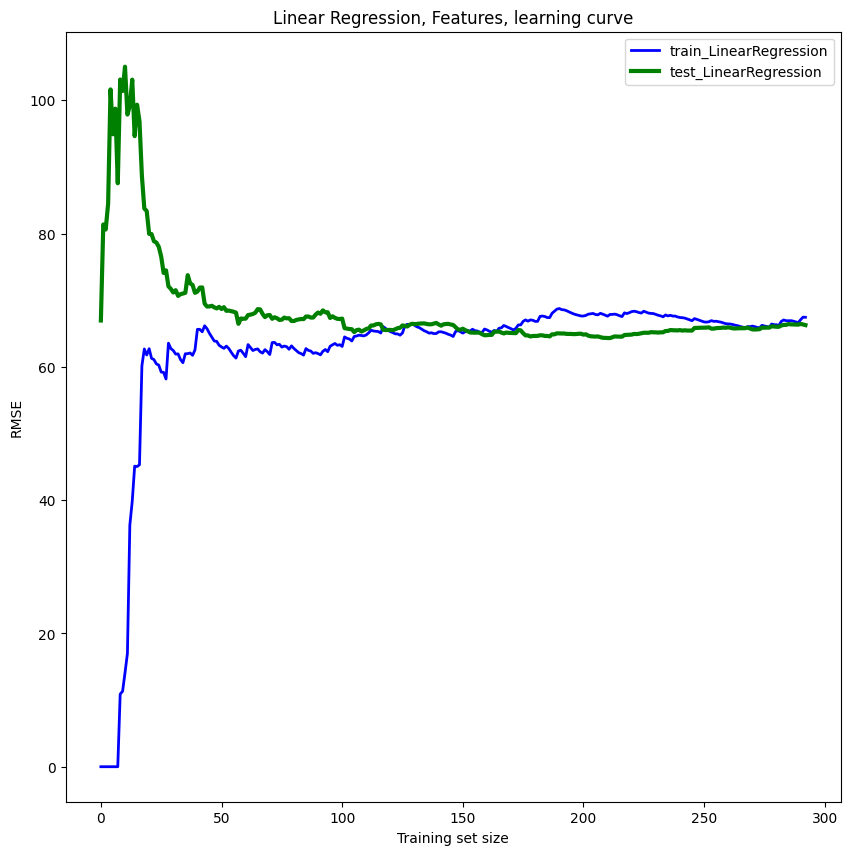

In [485]:
plt.figure(figsize=(10, 10))
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, df_train_features, y, "LinearRegression", 'g')
plt.title('Linear Regression, Features, learning curve')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()


In [486]:
final_rmse

[{'Linear Regression test': 66.78679659791713},
 {'Linear Regression train': 66.4131367390314},
 {'Ridge Regression test': 58.65254173109622},
 {'Ridge Regression train': 42.10261557811159},
 {'Lasso Regression test': 56.398550739245366},
 {'Lasso Regression train': 51.97521970860971},
 {'Linear Regression features test': 66.0050336150932},
 {'Linear Regression features train': 66.61741320391856}]